# Energy Efficiency <br>
by <br>
Mike Nelson and  <br>
Gordon Carter and <br>
Rebekah Silva <br>
May 2022

__did__<br>
ordered tasks<br>
added additional models<br>

__what to work on next__ <br>
KPIs <br>
fix graphs <br>
cite data source <br>

stress test 2 <br>


## Problem Statement <br>
According to Energy.gov 35% of a building’s energy consumption comes from heating, ventilation, and air conditioning.    We spend a large amount of time in buildings and in our residential living spaces, it is increasingly important to consider the performance of a system design to provide occupants with comfortable, cost-efficient, and safe living and work environments. 

Our purpose here is to determine if we can we use machine learning to accurately predict heating and cooling loads from basic building parameters with the goal of making more energy efficient buildings. We are using a dataset from UCI which includes known heating loads(HL) and cooling loads(CL). We will be studying the effect of 8 input variables (relative compactness (X1), surface area(X2), wall area(X3), roof area(X4), overall height(X5), orientation(X6), glazing area(X7) and area distribution(X8). We will use a supervised regression model to predict expected heating and cooling loads.

## Data Source <br>
We are using an Excel document from https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#. <br>
This data set contains 768 samples, with 8 independent variables and 2 dependent variables. These independent variables are building parameters. The dependent variables are the heating and cooling loads for those buildings.

## KPIs

## Data Dictionary <br>

Column  |  Name  |  Data Type | Description
-----|------------|--------|--------
X1  | Relative Compactness | float | unk <br>
X2  | Surface Area | float | sum of areas of walls and roof  <br>
X3  | Wall Area | float | sum of areas of walls <br>
X4  | Roof Area | float | area of roof <br>
X5  | Overall Height | float | 1 or 2 story tall <br>
X6  | Orientation | int | North, South, East, West <br>
X7  | Glazing Area | float | unk <br>
X8  | Glazing Area Distribution | int | unk  <br>
y1  | Heating Load | float | Energy cost to heat building <br>
y2  | Cooling Load | float | Energy cost to cool building <br>

### Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np 

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, KFold,cross_val_predict,learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
url = 'https://raw.githubusercontent.com/pythonandmore/EnergyEfficiency/main/ENB2012_data.csv'
data = pd.read_csv(url)
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [3]:
dataset=data[['X1','X2','X3','X4','X5','X6','X7','X8','Y1','Y2']]
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [4]:
print('Null Values =', dataset.isnull().values.any())

Null Values = True


In [5]:
# Drop null values in rows 
dataset.dropna(how='all', inplace=True)
# Drop null values in columns
#dataset.dropna(axis=1, inplace=True)

<ipython-input-5-ef39a57e70f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(how='all', inplace=True)


In [6]:
# Here we drop Unnamed columns for data cleaning improved visualization
df = dataset[['X1','X2','X3','X4','X5','X6','X7','X8','Y1','Y2']].rename({'X1':'Compactness','X2':'Surface Area','X3':'Wall Area','X4':'Roof Area','X5':'Height','X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area dist','Y1':'Heating load','Y2':'Cooling load'},axis=1,inplace=False)
df2=dataset[['X1','X3','X4','X6','X7','X8','Y1','Y2']]
#df_final
#df = df.astype(int)
#df.drop("Unnamed: 10", axis=1, inplace=True)
df.head()

,Compactness,Surface Area,Wall Area,Roof Area,Height,Orientation,Glazing Area,Glazing Area dist,Heating load,Cooling load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compactness        768 non-null    float64
 1   Surface Area       768 non-null    float64
 2   Wall Area          768 non-null    float64
 3   Roof Area          768 non-null    float64
 4   Height             768 non-null    float64
 5   Orientation        768 non-null    float64
 6   Glazing Area       768 non-null    float64
 7   Glazing Area dist  768 non-null    float64
 8   Heating load       768 non-null    float64
 9   Cooling load       768 non-null    float64
dtypes: float64(10)
memory usage: 66.0 KB


In [8]:
df.describe()

,Compactness,Surface Area,Wall Area,Roof Area,Height,Orientation,Glazing Area,Glazing Area dist,Heating load,Cooling load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Data Visualization

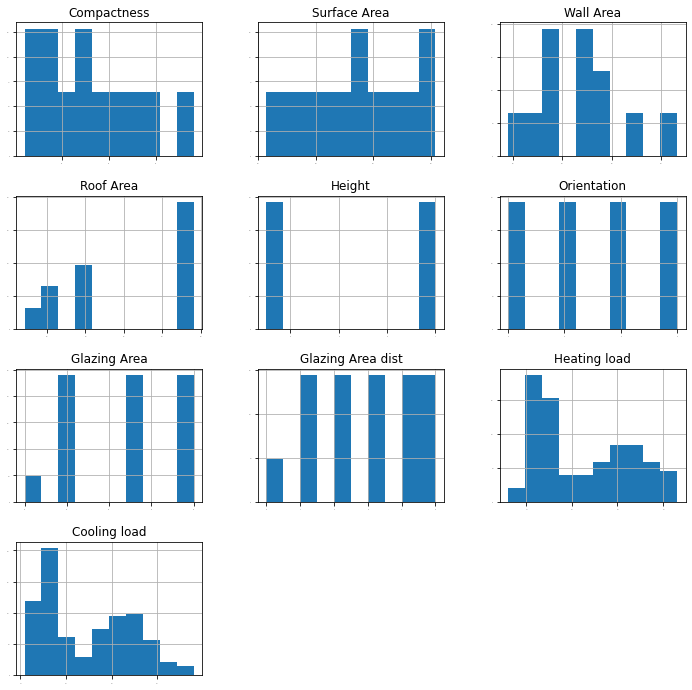

In [9]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

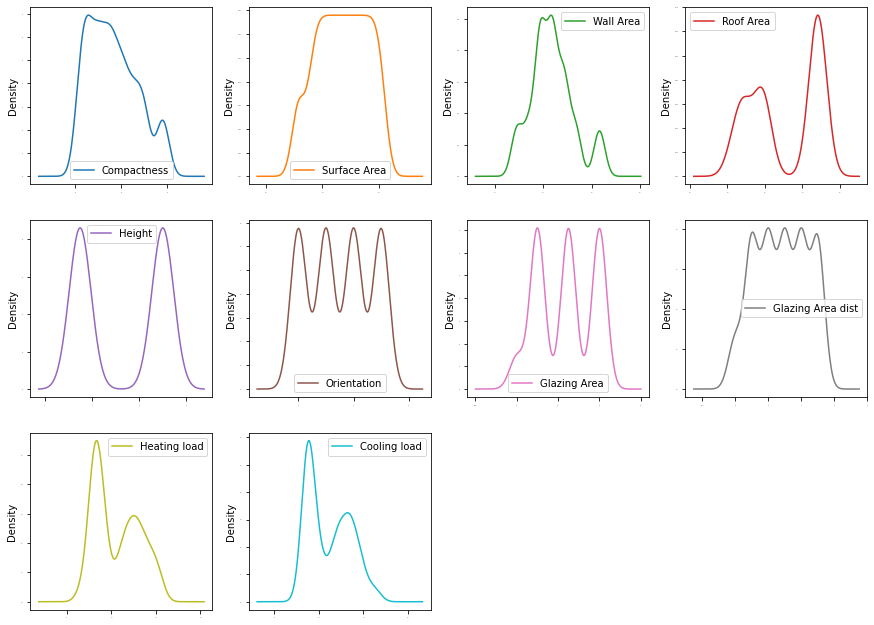

In [10]:
# density
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

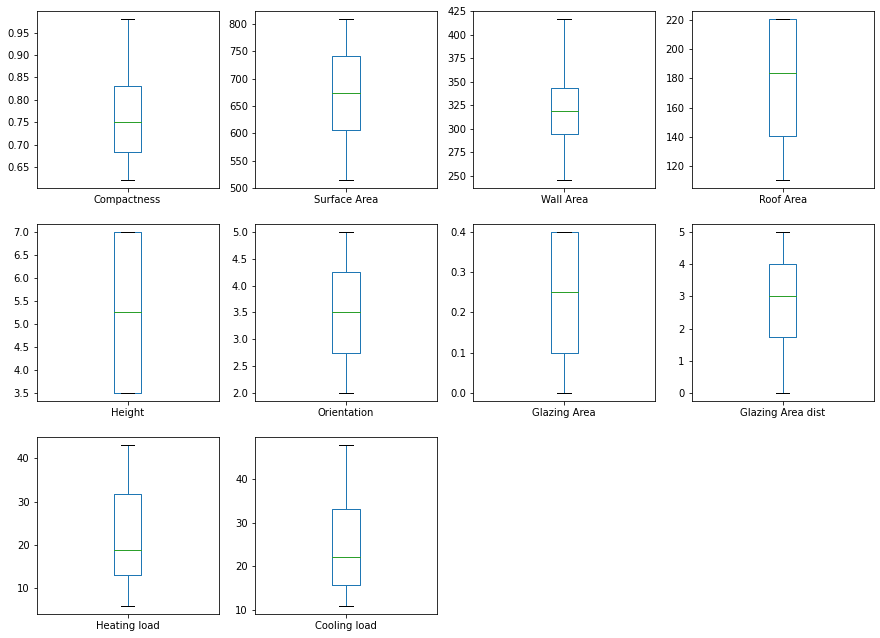

In [11]:
#Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

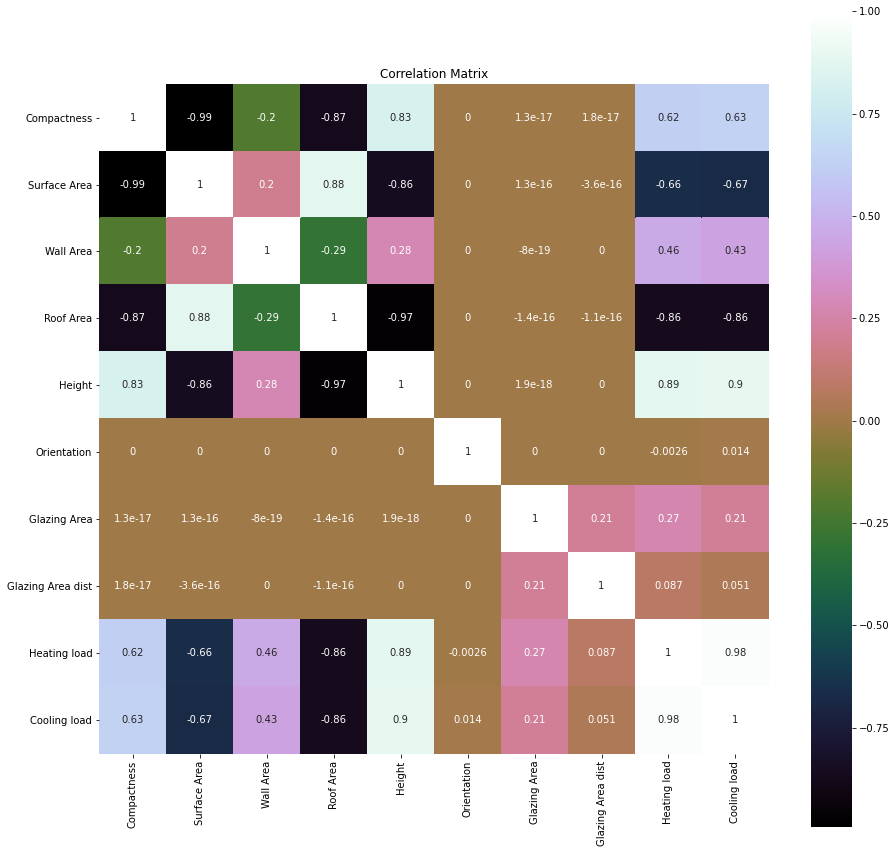

In [12]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


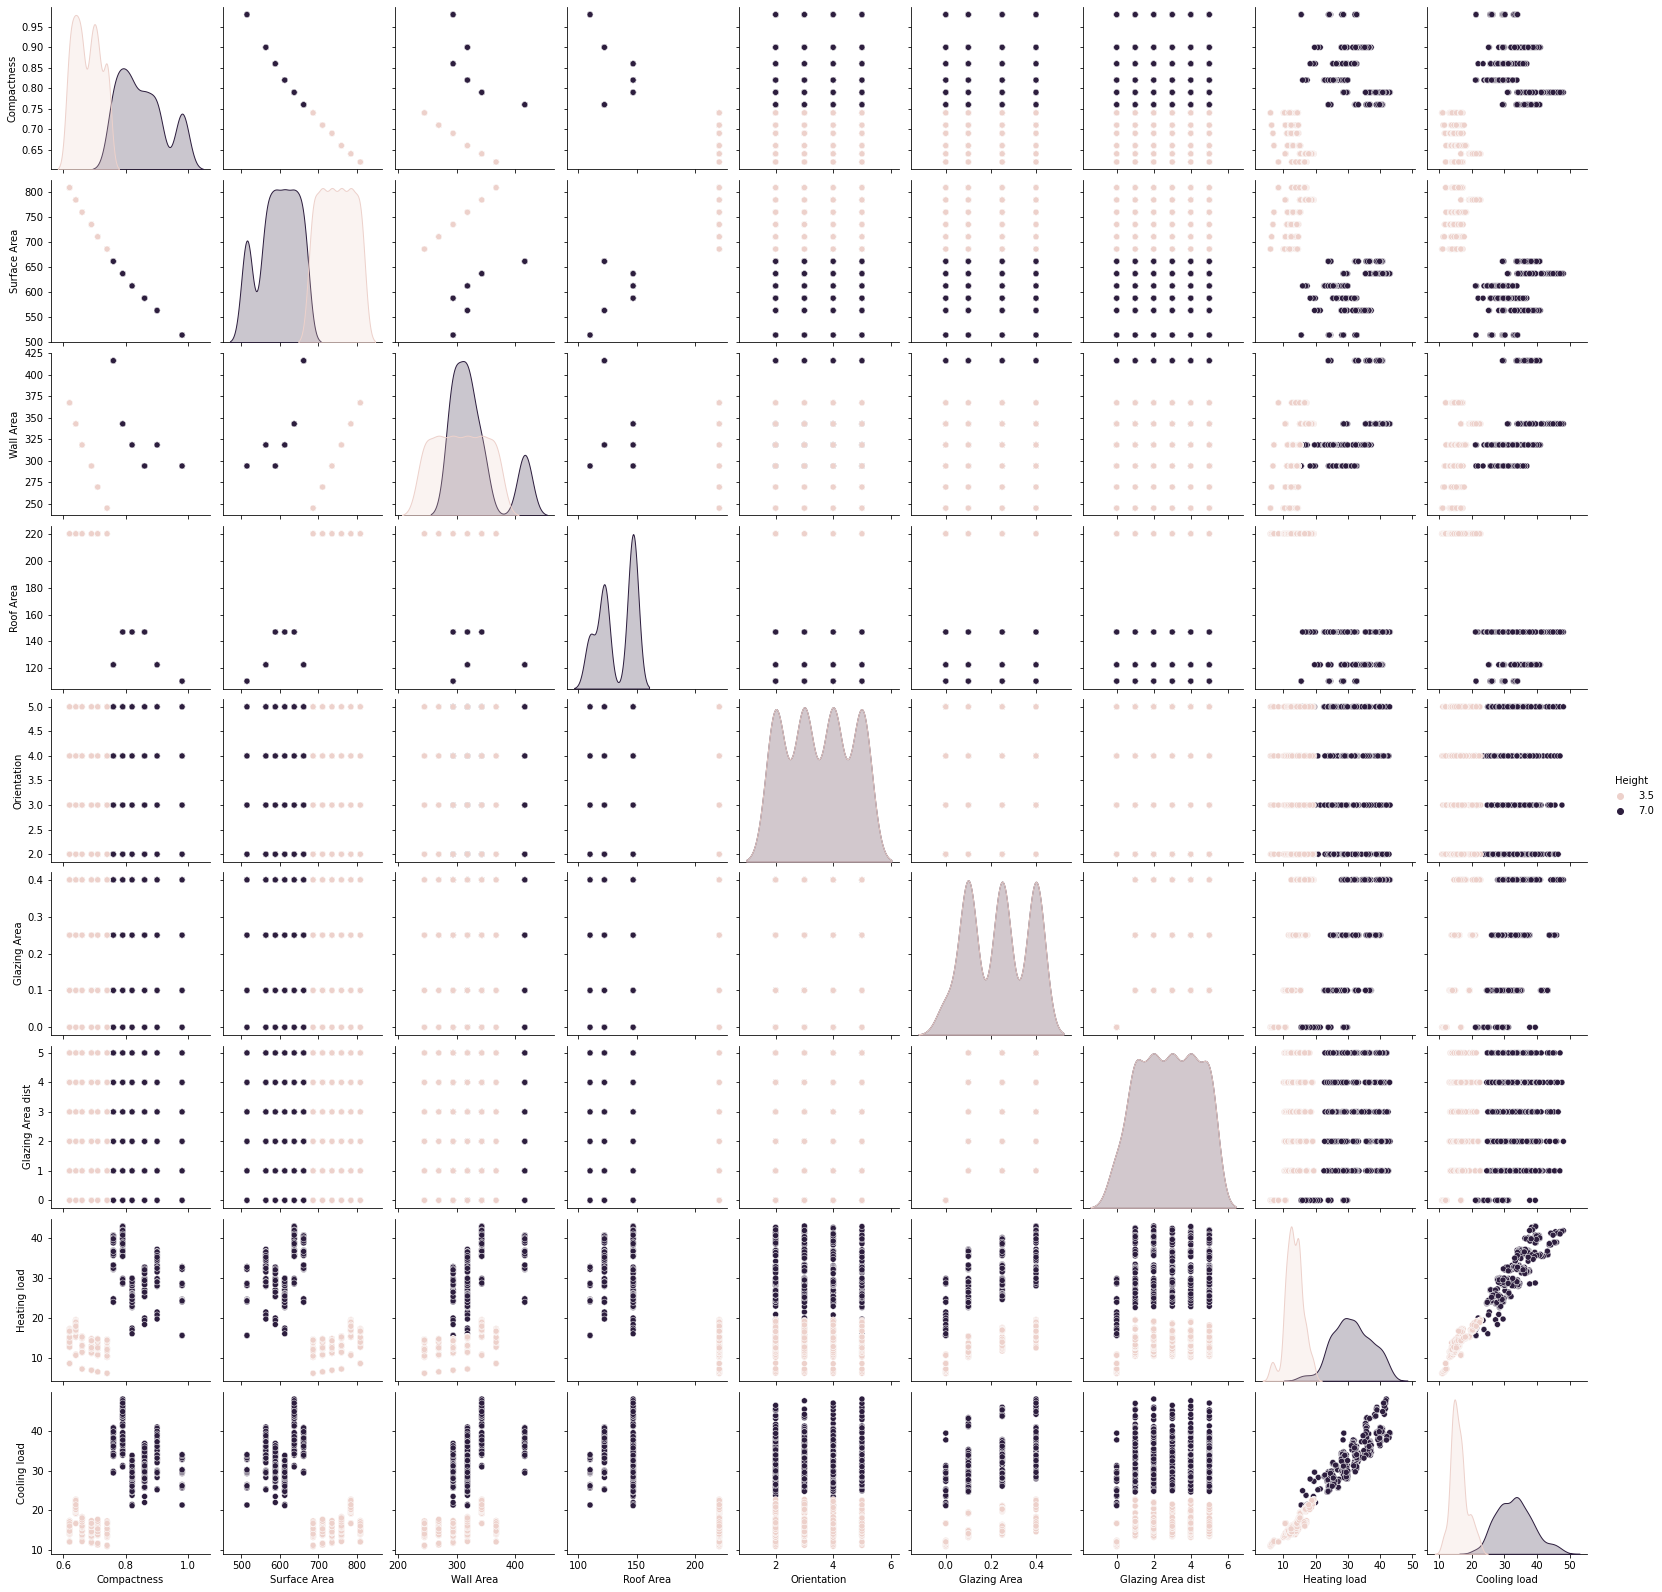

In [13]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df, hue='Height')
# to show
plt.show()

## Data Cleaning

In [21]:
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [22]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


## Linear Regression Model

In [23]:
#Target values
y1 = dataset['Y1']
y2 = dataset['Y2']

In [125]:
#Heating Load - Linear Regression - all X variables
x = dataset[['X1','X2','X3','X4','X5','X6','X7','X8']]
X_train, X_test, y_train, y_test = train_test_split(x,y1, test_size = 0.2, random_state = 12)
print('Heating Load - Linear Regression - all X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x,y1, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))



Heating Load - Linear Regression - all X variables
Training data score: 0.919
Testing data score: 0.903
Average cross validation score: 0.887


/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: Un

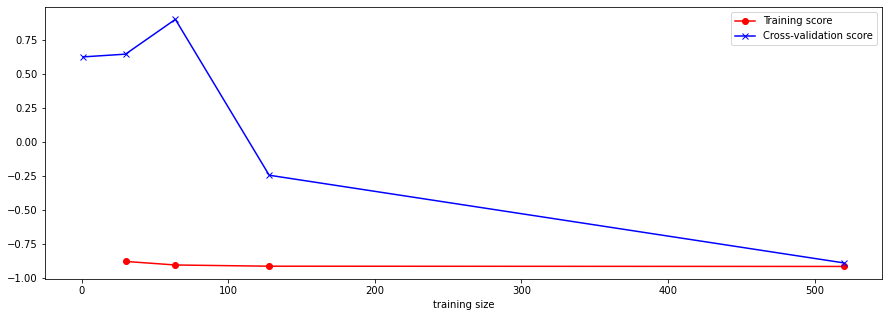

In [126]:

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,x,y1,train_sizes = [1,30,64,128,520]):
    train_sizes,train_scores,test_scores = learning_curve(estimator,x,y1,train_sizes = train_sizes,cv=5)

    mean_train_score = -np.mean(train_scores,axis=1)
    mean_test_score = -np.mean(test_scores,axis=1)

    plt.figure(figsize = (15,5))
    plt.xlabel('training size')
    #plt.ylabel('Test')
    plt.plot(train_sizes,mean_train_score,'-o',color='r',label="Training score")
    plt.plot(train_sizes,mean_test_score,'x-',color='b',label="Cross-validation score")
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(lr,x,y1)

In [127]:
#Heating Load - Polynomial Linear Regression - all X variables
x = dataset[['X1','X2','X3','X4','X5','X6','X7','X8']]
x1p = np.array(x)
y1p = np.array(y1)

pf = PolynomialFeatures(degree = 2)
x_poly = pf.fit_transform(x1p)
X_train, X_test, y_train, y_test = train_test_split(x_poly,y1p, test_size = 0.2, random_state = 12)
print('Heating Load - Polynomial Linear Regression - all X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x_poly,y1p, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Heating Load - Polynomial Linear Regression - all X variables
Training data score: 0.995
Testing data score: 0.995
Average cross validation score: 0.956


In [128]:
#Heating Load - Linear Regression - reduced X variables
#dropping X2 and X5 for high correlation to X1 and X4, respectively
x = dataset[['X1','X3','X4','X6','X7','X8']]

X_train, X_test, y_train, y_test = train_test_split(x,y1, test_size = 0.2, random_state = 12)
print('Heating Load - Linear Regression - reduced X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x,y1, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Heating Load - Linear Regression - reduced X variables
Training data score: 0.904
Testing data score: 0.88
Average cross validation score: 0.872


In [27]:
#Heating Load - Polynomial Linear Regression - reduced X variables
#dropping X2 and X5 for high correlation to X1 and X4, respectively
x = dataset[['X1','X3','X4','X6','X7','X8']]
x1p = np.array(x)
y1p = np.array(y1)

pf = PolynomialFeatures(degree = 2)
x_poly = pf.fit_transform(x1p)
X_train, X_test, y_train, y_test = train_test_split(x_poly,y1p, test_size = 0.2, random_state = 12)
print('Heating Load - Polynomial Linear Regression - reduced X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x_poly,y1p, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Heating Load - Polynomial Linear Regression - reduced X variables
Training data score: 0.981
Testing data score: 0.98
Average cross validation score: 0.946


In [28]:
#Cooling Load - Linear Regression - all X variables
x = dataset[['X1','X2','X3','X4','X5','X6','X7','X8']]
X_train, X_test, y_train, y_test = train_test_split(x,y2, test_size = 0.2, random_state = 12)
print('Cooling Load - Linear Regression - all X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x,y2, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Cooling Load - Linear Regression - all X variables
Training data score: 0.894
Testing data score: 0.858
Average cross validation score: 0.874


/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: Un

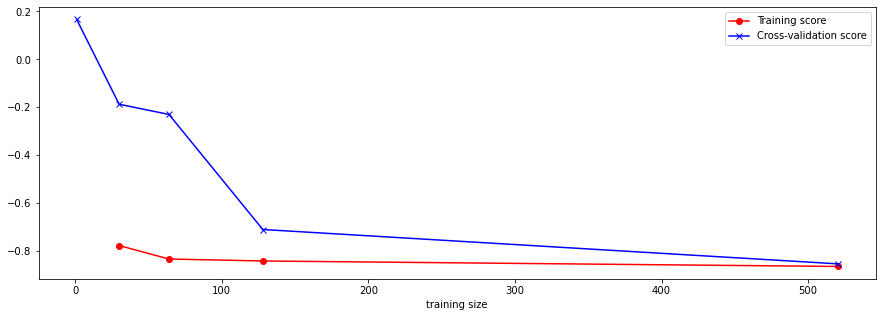

In [130]:

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,x,y2,train_sizes = [1,30,64,128,520]):
    train_sizes,train_scores,test_scores = learning_curve(estimator,x,y2,train_sizes = train_sizes,cv=5)

    mean_train_score = -np.mean(train_scores,axis=1)
    mean_test_score = -np.mean(test_scores,axis=1)

    plt.figure(figsize = (15,5))
    plt.xlabel('training size')
    #plt.ylabel('Test')
    plt.plot(train_sizes,mean_train_score,'-o',color='r',label="Training score")
    plt.plot(train_sizes,mean_test_score,'x-',color='b',label="Cross-validation score")
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(lr,x,y2)

In [29]:
#Cooling Load - Polynomial Linear Regression - all X variables
x = dataset[['X1','X2','X3','X4','X5','X6','X7','X8']]
x1p = np.array(x)
y2p = np.array(y2)

pf = PolynomialFeatures(degree = 2)
x_poly = pf.fit_transform(x1p)
X_train, X_test, y_train, y_test = train_test_split(x_poly,y2p, test_size = 0.2, random_state = 12)
print('Cooling Load - Polynomial Linear Regression - all X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x_poly,y2p, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Cooling Load - Polynomial Linear Regression - all X variables
Training data score: 0.973
Testing data score: 0.967
Average cross validation score: 0.895


In [30]:
#Cooling Load - Linear Regression - reduced X variables
#dropping X2 and X5 for high correlation to X1 and X4, respectively
x = dataset[['X1','X3','X4','X6','X7','X8']]

X_train, X_test, y_train, y_test = train_test_split(x,y2, test_size = 0.2, random_state = 12)
print('Cooling Load - Linear Regression - reduced X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x,y2, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Cooling Load - Linear Regression - reduced X variables
Training data score: 0.877
Testing data score: 0.832
Average cross validation score: 0.855


In [85]:
#Cooling Load - Polynomial Linear Regression - reduced X variables
#dropping X2 and X5 for high correlation to X1 and X4, respectively
x = dataset[['X1','X3','X4','X6','X7','X8']]
x1p = np.array(x)
y2p = np.array(y2)

pf = PolynomialFeatures(degree = 2)
x_poly = pf.fit_transform(x1p)
X_train, X_test, y_train, y_test = train_test_split(x_poly,y2p, test_size = 0.2, random_state = 12)
print('Cooling Load - Polynomial Linear Regression - reduced X variables')

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training data score:', round(lr.score(X_train, y_train),3))
print('Testing data score:', round(lr.score(X_test, y_test),3))

kfold_cv = KFold(n_splits = 5)
cv = cross_validate(LinearRegression(), x_poly,y2p, cv = kfold_cv)
print('Average cross validation score:',round(cv['test_score'].mean(),3))

Cooling Load - Polynomial Linear Regression - reduced X variables
Training data score: 0.951
Testing data score: 0.941
Average cross validation score: 0.936


# Decision Tree Model 

In [122]:
def plot_learning_curve(estimator,X,y,train_sizes = [1,16,64,128,512]):
    train_sizes,train_scores,test_scores = learning_curve(estimator,x,y,train_sizes = train_sizes,cv=5)

    mean_train_score = -np.mean(train_scores,axis=1)
    mean_test_score = -np.mean(test_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, mean_train_score - train_scores_std,
                     mean_train_score + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, mean_test_score - test_scores_std,
                     mean_test_score + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, mean_train_score, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, mean_test_score, 'x-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


   
    plt.figure(figsize = (15,10))
    plt.xlabel('Training size')
    plt.ylabel('Energy load Avg')
    plt.plot(train_sizes,mean_train_score,'o-',color='b',label="Training score")
    plt.plot(train_sizes,mean_test_score,'x-',color='r',label="Cross-validation score")
    plt.legend(loc='best')
    plt.show()

In [123]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import AdaBoostRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.9138189383023447

<b> Plot Heating load - y1 

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: Un

<module 'matplotlib.pyplot' from '/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

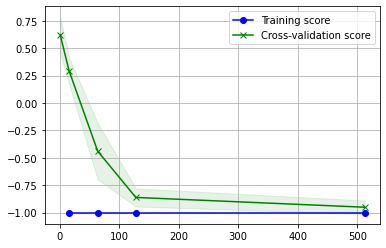

In [120]:
plot_learning_curve(model,x,y1.values.ravel())

<b> Plot the Cooling load - y2

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: Un

<module 'matplotlib.pyplot' from '/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

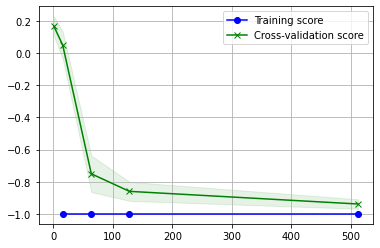

In [121]:
plot_learning_curve(model,x,y2.values.ravel())

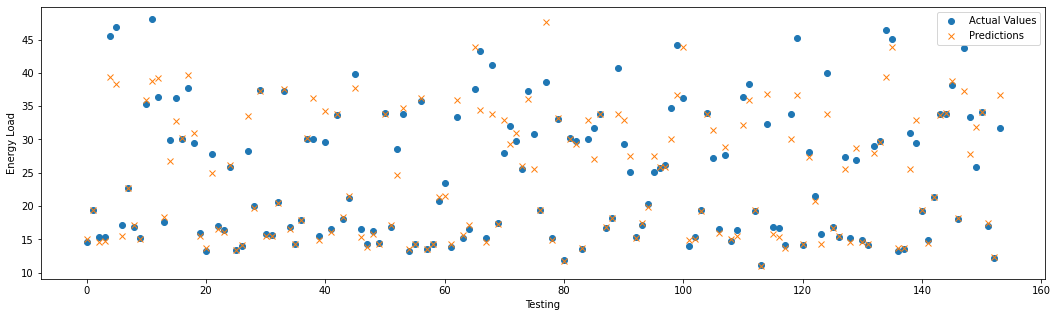

In [117]:
plt.figure(figsize = (18,5))
plt.plot(range(0,len(X_test)),y_test,'o',label = 'Actual Values')
plt.plot(range(0,len(X_test)),predictions,'x',label = 'Predictions')
plt.xlabel('Testing')
plt.ylabel('Energy Load')
plt.legend()
plt.show()